# Logisitic Regression Classifier with the Titanic Dataset

The objective of this simple program is to employ a logistic regression classifier to predict whether or not passengers survived depending on their age, sex and other features.

In this data there are lots of missing values and nan values. There are several ways of dealing with these values, including imputation or just removing the samples. We will choose the latter on this occasion.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

# import csv file into pandas dataframe
df = pd.read_csv('titanic_passenger_list.csv')

# discard columns with a lot of missing entries
df = df[['pclass', 'survived', 'sex', 'age', 'fare', 'embarked']]
# drop rows with nan values
df = df.dropna()
# produce basic statistics for 'age' and 'fare' columns
print(df[['age', 'fare']].describe())

               age         fare
count  1043.000000  1043.000000
mean     29.813202    36.603024
std      14.366254    55.753648
min       0.170000     0.000000
25%      21.000000     8.050000
50%      28.000000    15.750000
75%      39.000000    35.077100
max      80.000000   512.329200


We will produce some boxplots and histograms to easily visualise some of the patterns in the data.

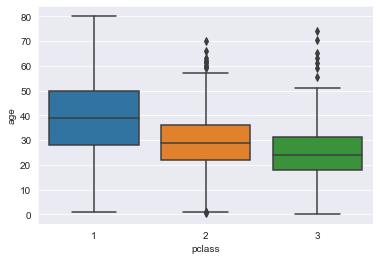

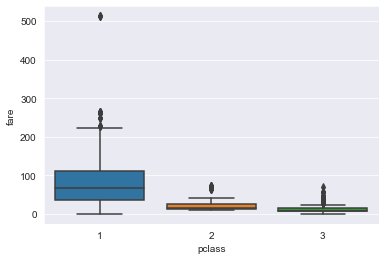

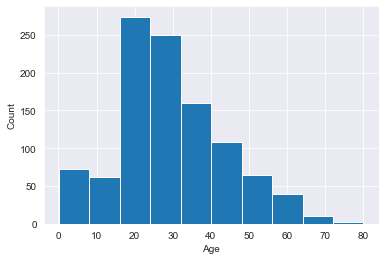

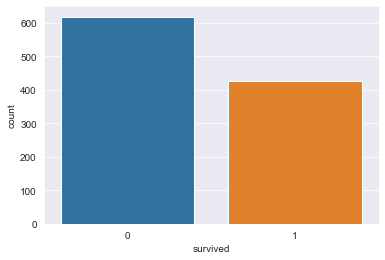

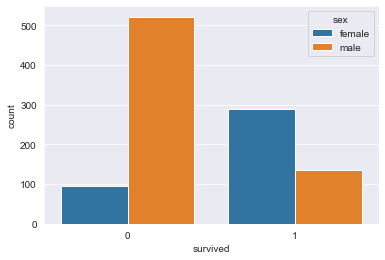

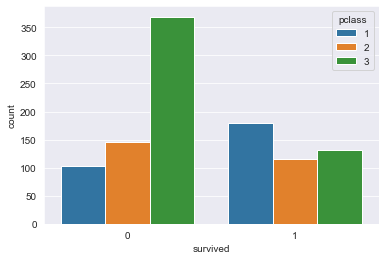

In [51]:
# generate boxplots
sns.set_style('darkgrid')
sns.boxplot(df['pclass'], df['age'])
fig = plt.figure()
sns.boxplot(df['pclass'], df['fare'])
# generate histograms and countplots
fig = plt.figure()
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
fig = plt.figure()
sns.countplot(x = 'survived', data = df)
fig = plt.figure()
sns.countplot(x = 'survived', hue = 'sex', data = df)
fig = plt.figure()
sns.countplot(x = 'survived', hue = 'pclass', data = df)
plt.show()

The plots show that amongst the remaining passengers, more passengers died than survived, more men died than women, and more women survived than men. Also, the majority of passenger deaths occured amongst those in third class. 

The 'sex' and 'embarked' columns of the dataframe contain non-numerical values which are not compatible with sklearn. The get_dummies function converts a column of non-numerical values into a number of binary columns. The number of columns is equal to the number of different non-numerical values in the original columns. For example, if in the original 'sex' column the elements can be either 'male' or 'female, then get_dummies will produce two binary columns which indicate the orginal element value. However, we then remove one of these columns as we lose no knowledge in doing so due to their binary nature, and because in not doing so we risk running into collinearity issues. Passengers were able to embark in Southamptom, Cherbourg, and Queenstown, so we expect two columns to be output from get_dummies.

In [52]:
# generate dummy variables for non-numeric columns
# drop_first = True ensures there is one column only and not
# corresponding male and female columns
sex_data = pd.get_dummies(df['sex'], drop_first = True)
embarked_data = pd.get_dummies(df['embarked'], drop_first = True)

# add new columns to the dataframe
df = pd.concat([df, sex_data, embarked_data], axis = 1)
# drop original columns
df = df.drop(['embarked', 'sex'], axis = 1)
print(df.head())

   pclass  survived    age      fare  male  Q  S
0       1         1  29.00  211.3375     0  0  1
1       1         1   0.92  151.5500     1  0  1
2       1         0   2.00  151.5500     0  0  1
3       1         0  30.00  151.5500     1  0  1
4       1         0  25.00  151.5500     0  0  1


We assign the X and y variables to the features and target, which is the 'survived' column.

In [55]:
# split data into X and y and training and testing sets
X = df.drop('survived', axis = 1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

We create the logistic regression classifier, fit to the training data and make predictions for the test data.

In [60]:
# create the logistic regression classifier
log_reg = LogisticRegression(solver = 'liblinear')
# fit model on the training data
log_reg.fit(X_train, y_train)
# predict the labels of the test data
y_pred = log_reg.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[105  21]
 [ 28  55]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       126
           1       0.72      0.66      0.69        83

    accuracy                           0.77       209
   macro avg       0.76      0.75      0.75       209
weighted avg       0.76      0.77      0.76       209



We can plot the Receiver Operating Characteristic (ROC) curve to see how model performance varies with the hypothesis function threshold, and give a general idea of the performance of the model with the Area Under the Curve (AUC) score.

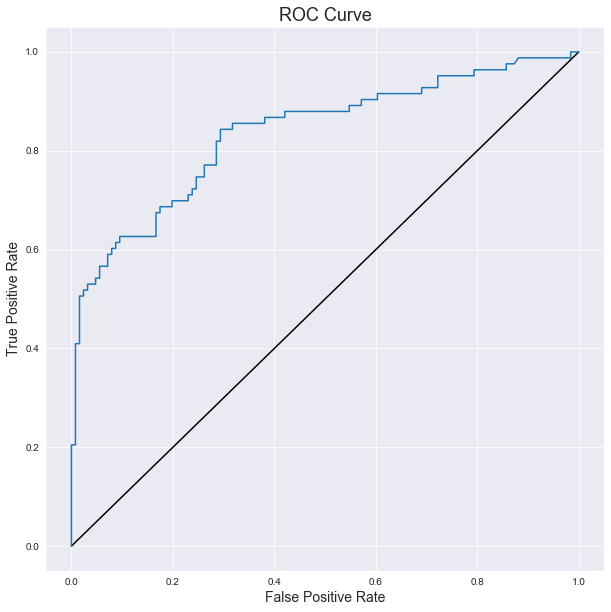

AUC: 0.75


In [72]:
# plot Receiver Operating Characteristic (ROC) curve

# compute predicted y probabilities from X_test
# the first column is the probability that y = 0 and the second column is the probability that y = 1
# in this case we desire the second column
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
# fpr = false positive rates
# tpr = true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

fig2 = plt.figure(figsize = (10, 10))
ax = fig2.add_subplot(111)
ax.plot([0, 1], [0, 1], color  = 'k')
ax.plot(fpr, tpr)
ax.set_xlabel('False Positive Rate', fontsize = 14)
ax.set_ylabel('True Positive Rate', fontsize = 14)
ax.set_title('ROC Curve', fontsize = 18)
plt.show()

# Compute and print the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print('AUC: {:.2f}'.format(auc_score))